In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras.backend as K

In [2]:
input_columns = ['year', 'month', 'day', 'hour', 'minute', 'moisture0', 'moisture1', 'moisture2']
prediction = ['moisture3']

In [3]:
train_size = 4000
test_size = 1000

In [4]:
def sum_error(y_true, y_pred):
        return K.sum(K.abs(y_pred - y_true))

In [5]:
K.eval(K.sum(K.abs(np.array([0,3]) - np.array([2,5]))))

4

In [6]:
data_frame = pd.read_csv('soil_moisture_dataset.csv')

In [7]:
data_frame

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,condition
0,2020,3,6,22,16,11,0.70,0.64,0.73,0.40,0.02,False
1,2020,3,6,22,17,11,0.70,0.64,0.71,0.39,0.02,False
2,2020,3,6,22,18,11,0.69,0.63,0.70,0.39,0.02,False
3,2020,3,6,22,19,11,0.69,0.63,0.70,0.39,0.02,False
4,2020,3,6,22,20,12,0.69,0.62,0.69,0.39,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2020,3,9,19,12,49,0.18,0.62,0.60,0.10,0.03,False
4113,2020,3,9,19,13,49,0.18,0.62,0.59,0.10,0.02,False
4114,2020,3,9,19,14,49,0.18,0.62,0.59,0.10,0.02,False
4115,2020,3,9,19,15,49,0.18,0.62,0.60,0.10,0.02,False


In [8]:
data_frame = data_frame.sample(frac=1)

In [9]:
data_frame.drop(columns=['condition'])

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4
3884,2020,3,9,15,24,38,0.20,0.63,0.60,0.10,0.02
1471,2020,3,7,23,9,36,0.54,0.67,0.71,0.52,0.03
2884,2020,3,8,22,43,48,0.37,0.65,0.66,0.12,0.03
3841,2020,3,9,14,41,36,0.21,0.63,0.60,0.09,0.02
1978,2020,3,8,7,37,2,0.50,0.68,0.71,0.27,0.02
...,...,...,...,...,...,...,...,...,...,...,...
742,2020,3,7,10,49,40,0.56,0.66,0.73,0.58,0.02
2981,2020,3,9,0,20,53,0.34,0.63,0.65,0.11,0.02
3003,2020,3,9,0,42,54,0.34,0.63,0.64,0.11,0.02
3926,2020,3,9,16,6,40,0.19,0.63,0.60,0.09,0.02


<AxesSubplot:>

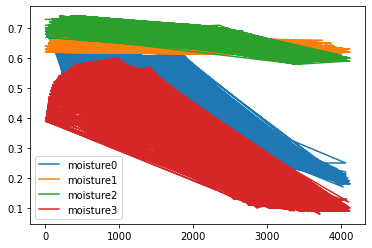

In [10]:
data_frame[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()

In [11]:
X_train = data_frame[input_columns][:train_size]
Y_train = data_frame[prediction][:train_size]
X_test = data_frame[input_columns][train_size:]
Y_test = data_frame[prediction][train_size:]

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4000, 8), (4000, 1), (117, 8), (117, 1))

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=len(input_columns), input_shape=(len(input_columns),), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=len(prediction), input_shape=(len(input_columns),)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss=sum_error, metrics=['MSE'])

In [17]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 1s 924us/step - loss: 3642.4980 - MSE: 26561.0801
Epoch 2/10
125/125 [==============================] - 0s 972us/step - loss: 1474.6873 - MSE: 8318.3857
Epoch 3/10
125/125 [==============================] - 0s 1ms/step - loss: 1237.8683 - MSE: 5754.6685
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 871.4534 - MSE: 3071.0505
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 657.0413 - MSE: 1765.5663
Epoch 6/10
125/125 [==============================] - 0s 988us/step - loss: 452.9286 - MSE: 840.1107
Epoch 7/10
125/125 [==============================] - 0s 893us/step - loss: 285.5810 - MSE: 323.9588
Epoch 8/10
125/125 [==============================] - 0s 1ms/step - loss: 115.7572 - MSE: 55.8185
Epoch 9/10
125/125 [==============================] - 0s 967us/step - loss: 11.0020 - MSE: 0.4079
Epoch 10/10
125/125 [==============================] - 0s 806us/step - loss: 6.8088 - MSE: 0.0

In [18]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 5.5653 - MSE: 0.0414


[5.565337657928467, 0.041370689868927]

In [19]:
weights = np.array(model.get_weights())

C:\Users\ibesi\AppData\Local\Temp\ipykernel_22260\4225249613.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(model.get_weights())


In [20]:
model.get_weights()

[array([[-4.64445353e-02,  1.34918198e-01,  2.61093855e-01,
          2.94424482e-02, -6.01072907e-02, -9.30252858e-03,
         -5.29123902e-01, -4.02647158e-04],
        [ 2.96805501e-01, -2.43770316e-01, -3.83983761e-01,
         -1.40381798e-01, -2.54802793e-01,  1.53295705e-02,
          2.19897151e-01, -4.02578443e-01],
        [ 1.30988836e-01, -6.75804794e-01, -3.60638857e-01,
         -3.82668190e-02, -5.13323069e-01, -5.55677712e-01,
          1.57878578e-01, -8.80240574e-02],
        [ 1.78691626e-01, -3.96535277e-01,  5.31763434e-01,
          1.23089187e-01, -2.37697184e-01,  4.73224014e-01,
          1.86766028e-01,  6.34358376e-02],
        [ 2.31894195e-01, -4.97703373e-01, -1.50286064e-01,
          2.25037798e-01,  8.33382010e-02,  1.87566563e-01,
         -4.91268605e-01, -1.09535949e-02],
        [ 1.76889956e-01, -3.55224311e-01,  1.29234642e-01,
          5.19140899e-01, -3.68969858e-01,  3.58684063e-02,
         -1.86717004e-01, -2.46554077e-01],
        [-4.8277

In [21]:
Y_test.to_numpy()[58]

array([0.31])

In [22]:
prediction = model.predict(X_test.to_numpy())

4/4 [==============================] - 0s 1ms/step


In [23]:
count = 0
for i in range(len(X_test)):
    if np.abs(prediction[i][0] - Y_test.to_numpy()[i]) > 0.1:
        count += 1
print(count/len(X_test))

0.7863247863247863


In [24]:
input_columns = ['year', 'month', 'day', 'hour', 'minute', 'moisture0', 'moisture1', 'moisture2']
prediction = ['moisture4']

In [25]:
train_size = 4000
test_size = 1000

In [26]:
def sum_error(y_true, y_pred):
        return K.sum(K.abs(y_pred - y_true))

In [27]:
K.eval(K.sum(K.abs(np.array([0,3]) - np.array([2,5]))))

4

In [28]:
data_frame = pd.read_csv('soil_moisture_dataset.csv')

In [29]:
data_frame

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,condition
0,2020,3,6,22,16,11,0.70,0.64,0.73,0.40,0.02,False
1,2020,3,6,22,17,11,0.70,0.64,0.71,0.39,0.02,False
2,2020,3,6,22,18,11,0.69,0.63,0.70,0.39,0.02,False
3,2020,3,6,22,19,11,0.69,0.63,0.70,0.39,0.02,False
4,2020,3,6,22,20,12,0.69,0.62,0.69,0.39,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2020,3,9,19,12,49,0.18,0.62,0.60,0.10,0.03,False
4113,2020,3,9,19,13,49,0.18,0.62,0.59,0.10,0.02,False
4114,2020,3,9,19,14,49,0.18,0.62,0.59,0.10,0.02,False
4115,2020,3,9,19,15,49,0.18,0.62,0.60,0.10,0.02,False


In [30]:
data_frame = data_frame.sample(frac=1)

In [31]:
data_frame.drop(columns=['condition'])

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4
1239,2020,3,7,19,17,24,0.56,0.67,0.72,0.53,0.02
2331,2020,3,8,13,30,20,0.44,0.66,0.70,0.33,0.02
2632,2020,3,8,18,31,35,0.39,0.65,0.68,0.14,0.02
1094,2020,3,7,16,41,58,0.56,0.66,0.71,0.54,0.02
1582,2020,3,8,1,0,42,0.52,0.69,0.70,0.49,0.02
...,...,...,...,...,...,...,...,...,...,...,...
3097,2020,3,9,2,16,59,0.33,0.61,0.65,0.11,0.02
3648,2020,3,9,11,28,26,0.22,0.62,0.60,0.10,0.02
2519,2020,3,8,16,38,29,0.41,0.65,0.69,0.16,0.02
1220,2020,3,7,18,48,4,0.60,0.67,0.71,0.52,0.02


<AxesSubplot:>

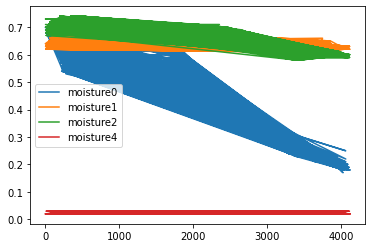

In [32]:
data_frame[['moisture0', 'moisture1','moisture2', 'moisture4']].plot()

In [33]:
X_train = data_frame[input_columns][:train_size]
Y_train = data_frame[prediction][:train_size]
X_test = data_frame[input_columns][train_size:]
Y_test = data_frame[prediction][train_size:]

In [34]:
X_train.shape, Y_train.shape

((4000, 8), (4000, 1))

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=len(input_columns), input_shape=(len(input_columns),), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=len(prediction), input_shape=(len(input_columns),)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss=sum_error, metrics=['MSE'])

In [37]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 0s 879us/step - loss: 27368.9727 - MSE: 896724.5000
Epoch 2/10
125/125 [==============================] - 0s 823us/step - loss: 5290.0488 - MSE: 59992.6641
Epoch 3/10
125/125 [==============================] - 0s 823us/step - loss: 3801.7700 - MSE: 41103.1875
Epoch 4/10
125/125 [==============================] - 0s 855us/step - loss: 3165.3486 - MSE: 29753.6426
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 2886.0107 - MSE: 25140.0781
Epoch 6/10
125/125 [==============================] - 0s 1ms/step - loss: 2488.1272 - MSE: 19394.2520
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 2050.8604 - MSE: 13822.1914
Epoch 8/10
125/125 [==============================] - 0s 1000us/step - loss: 1693.2397 - MSE: 9866.9346
Epoch 9/10
125/125 [==============================] - 0s 1ms/step - loss: 1311.1323 - MSE: 6563.0811
Epoch 10/10
125/125 [==============================] - 0s 1ms/step - lo

In [38]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 29.9032 - MSE: 1.4820


[29.90324592590332, 1.4820306301116943]

In [39]:
weights = np.array(model.get_weights())

C:\Users\ibesi\AppData\Local\Temp\ipykernel_22260\4225249613.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(model.get_weights())


In [40]:
model.get_weights()

[array([[-2.76366413e-01,  1.50379986e-01, -5.95475547e-04,
          1.10667452e-01, -1.62589010e-02, -1.95671529e-01,
          3.88285339e-01,  4.51318622e-01],
        [-3.59679073e-01, -6.09061182e-01, -3.79141659e-01,
         -2.27499425e-01, -6.28432930e-01, -5.80291808e-01,
          4.99538690e-01, -1.71495840e-01],
        [ 3.34313333e-01,  2.27784708e-01, -3.50456568e-03,
         -1.07258484e-01,  3.79405111e-01, -3.76291364e-01,
          2.09835783e-01, -4.76606488e-01],
        [ 5.19478619e-01, -3.99454653e-01, -1.26836106e-01,
         -1.24111414e-01, -1.56462148e-01,  4.27250206e-01,
         -2.72233576e-01, -6.24751508e-01],
        [ 9.32782888e-02, -1.73195392e-01,  3.55630100e-01,
         -3.14873934e-01,  4.30756003e-01,  3.70065331e-01,
          2.22101361e-01, -2.11558193e-01],
        [ 2.90678442e-01, -7.60274410e-01, -7.38911569e-01,
         -5.59070826e-01,  2.17856944e-01, -4.77322340e-02,
         -5.76552510e-01, -1.34563938e-01],
        [ 2.4693

In [41]:
Y_test.to_numpy()[58]

array([0.02])

In [42]:
prediction = model.predict(X_test.to_numpy())

4/4 [==============================] - 0s 1ms/step


In [43]:
count = 0
for i in range(len(X_test)):
    if np.abs(prediction[i][0] - Y_test.to_numpy()[i]) > 0.1:
        count += 1
print(count/len(X_test))

0.9743589743589743
